In [ ]:
import csv
import json
import re
import random
import pandas as pd

## test: a farewell to arms

In [ ]:
!wget "https://www.gutenberg.org/cache/epub/75201/pg75201.txt"


--2025-11-01 02:45:26--  https://www.gutenberg.org/cache/epub/75201/pg75201.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 525559 (513K) [text/plain]
Saving to: ‘pg75201.txt’

pg75201.txt         100%[===================>] 513.24K  --.-KB/s    in 0.1s    

2025-11-01 02:45:27 (3.76 MB/s) - ‘pg75201.txt’ saved [525559/525559]



In [ ]:
with open("pg75201.txt", "r", encoding="utf-8") as f:
    text = f.read()

# Find where the main story starts (the first occurrence of 'CHAPTER I')
start_index = text.find("CHAPTER I")
if start_index != -1:
    text = text[start_index:]  # keep everything from "CHAPTER I" onward
else:
    print("Warning: 'CHAPTER I' not found — check the exact capitalization or wording")

# Split into paragraphs by newline
paragraphs = [p.strip() for p in text.split("\n\n") if p.strip()]

paragraphs = [p.replace("\n", " ") for p in paragraphs]

print(f"Total paragraphs after cleaning: {len(paragraphs)}")
print(paragraphs[:2])  # preview the first few paragraphs


Total paragraphs after cleaning: 4190
['CHAPTER I', 'In the late summer of that year we lived in a house in a village that looked across the river and the plain to the mountains. In the bed of the river there were pebbles and boulders, dry and white in the sun, and the water was clear and swiftly moving and blue in the channels. Troops went by the house and down the road and the dust they raised powdered the leaves of the trees. The trunks of the trees too were dusty and the leaves fell early that year and we saw the troops marching along the road and the dust rising and leaves, stirred by the breeze, falling and the soldiers marching and afterward the road bare and white except for the leaves.']


In [ ]:
paragraphs[0]

'CHAPTER I'

In [ ]:
paragraphs[1]

'In the late summer of that year we lived in a house in a village that looked across the river and the plain to the mountains. In the bed of the river there were pebbles and boulders, dry and white in the sun, and the water was clear and swiftly moving and blue in the channels. Troops went by the house and down the road and the dust they raised powdered the leaves of the trees. The trunks of the trees too were dusty and the leaves fell early that year and we saw the troops marching along the road and the dust rising and leaves, stirred by the breeze, falling and the soldiers marching and afterward the road bare and white except for the leaves.'

In [ ]:
paragraphs[2]

'The plain was rich with crops; there were many orchards of fruit trees and beyond the plain the mountains were brown and bare. There was fighting in the mountains and at night we could see the flashes from the artillery. In the dark it was like summer lightning, but the nights were cool and there was not the feeling of a storm coming.'

# Function to retrieve data

In [ ]:
def load_book(filepath, start_marker="CHAPTER I", min_words=0, max_words=0):
    """
    Reads a Project Gutenberg text file and returns a list of cleaned paragraphs.

    Args:
        filepath (str): Path to the .txt file.
        start_marker (str): Text to mark where the story begins (e.g., 'CHAPTER I', 'BOOK ONE', etc.).
        min_words (int): Minimum number of words per paragraph to keep (default=0 means keep all).

    Returns:
        list of str: Cleaned paragraph strings.
    """
    with open(filepath, "r", encoding="utf-8") as f:
        text = f.read()

    # get title
    title_match = re.search(r"Title:\s*(.+)", text)
    title = title_match.group(1).strip() if title_match else None

    # Locate the start marker
    match = re.search(start_marker, text, flags=re.IGNORECASE)
    if match:
        text = text[match.start():]
    else:
        print(f"Warning: '{start_marker}' not found — using full text")

    end_match = re.search(r"\*\*\* END OF THE PROJECT GUTENBERG EBOOK.*?\*\*\*", text, flags=re.IGNORECASE | re.DOTALL)
    if end_match:
        text = text[:end_match.start()]

    # Split into paragraphs by two or more newlines
    paragraphs = [p.strip() for p in re.split(r"\n\s*\n", text) if p.strip()]

    # Replace single newlines inside paragraphs with spaces
    paragraphs = [p.replace("\n", " ") for p in paragraphs]

    # Optionally filter by minimum word count
    if min_words > 0 and max_words > 0:
        paragraphs = [p for p in paragraphs if min_words <= len(p.split()) <= max_words ]

    return {"title": title, "paragraphs": paragraphs}

# Sampling

In [ ]:
sampled_paragraphs = random.sample(paragraphs, 20)
sampled_paragraphs[0]

'“Yes.”'

## Get all the book links

In [ ]:
## 1. A farewell to arms
!wget "https://www.gutenberg.org/cache/epub/75201/pg75201.txt"

## 2. The murder of Roger Ackroyd
!wget https://www.gutenberg.org/cache/epub/69087/pg69087.txt

## 3. Swann's Way
!wget https://www.gutenberg.org/cache/epub/7178/pg7178.txt

## 4. Metamorphosis
!wget https://www.gutenberg.org/cache/epub/5200/pg5200.txt

## 5. The Age of Innocence
!wget https://www.gutenberg.org/cache/epub/541/pg541.txt

## 6. Mrs. Dalloway
!wget https://www.gutenberg.org/cache/epub/71865/pg71865.txt

## 7. The Garden Party
!wget https://www.gutenberg.org/cache/epub/1429/pg1429.txt

## 8. The Dunwich horror
!wget https://www.gutenberg.org/cache/epub/50133/pg50133.txt

## 9. Martin Eden
!wget https://www.gutenberg.org/cache/epub/1056/pg1056.txt

## 10. Dubliners
!wget https://www.gutenberg.org/cache/epub/2814/pg2814.txt

## 11. The Picture of Dorian Gray
!wget https://www.gutenberg.org/cache/epub/174/pg174.txt

## 12. A Room with a View
!wget https://www.gutenberg.org/cache/epub/2641/pg2641.txt

## 13. The Great Gatsby
!wget https://www.gutenberg.org/cache/epub/64317/pg64317.txt

## 14. The Awakening
!wget https://www.gutenberg.org/cache/epub/160/pg160.txt

## 15. My Antonia
!wget https://www.gutenberg.org/cache/epub/242/pg242.txt




--2025-11-16 10:21:14--  https://www.gutenberg.org/cache/epub/75201/pg75201.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 525559 (513K) [text/plain]
Saving to: ‘pg75201.txt.1’

pg75201.txt.1       100%[===================>] 513.24K  1.46MB/s    in 0.3s    

2025-11-16 10:21:23 (1.46 MB/s) - ‘pg75201.txt.1’ saved [525559/525559]

--2025-11-16 10:21:23--  https://www.gutenberg.org/cache/epub/69087/pg69087.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 449345 (439K) [text/plain]
Saving to: ‘pg69087.txt.1’

pg69087.txt.1       100%[===================>] 438.81K  1.29MB/s    in 0.3s    

2025-11-16 10:21:31

In [ ]:
files = [
    "pg75201.txt",  # A Farewell to Arms
    "pg69087.txt",  # The Murder of Roger Ackroyd
    "pg7178.txt",   # Swann's Way
    "pg5200.txt",   # Metamorphosis
    "pg541.txt",    # The Age of Innocence
    "pg71865.txt",  # Mrs. Dalloway
    "pg1429.txt",   # The Garden Party
    "pg50133.txt",  # The Dunwich Horror
    "pg1056.txt",   # Martin Eden
    "pg2814.txt",   # Dubliners
    "pg174.txt",    # The Picture of Dorian Gray
    "pg2641.txt",   # A Room with a View
    "pg64317.txt",  # The Great Gatsby
    "pg160.txt",    # The Awakening
    "pg242.txt"     # My Antonia
]

A_Farewell_to_Arms = load_book(files[0], start_marker="CHAPTER I", min_words=50, max_words=400)
The_Murder_of_Roger_Ackroyd = load_book(files[1], start_marker="CHAPTER I", min_words=50, max_words=400)
Swanns_Way = load_book(files[2], start_marker="OVERTURE", min_words=50, max_words=400)
Metamorphosis = load_book(files[3], start_marker="I", min_words=50, max_words=400)
The_Age_of_Innocence = load_book(files[4], start_marker="Book I", min_words=50, max_words=400)
Mrs_Dalloway = load_book(files[5], start_marker="Mrs. Dalloway said", min_words=50, max_words=400)
The_Garden_Party = load_book(files[6], start_marker="To John Middleton Murry", min_words=50, max_words=400)
The_Dunwich_Horror = load_book(files[7], start_marker="by H. P. LOVECRAFT", min_words=50, max_words=400)
Martin_Eden = load_book(files[8], start_marker="CHAPTER I.", min_words=50, max_words=400)
Dubliners = load_book(files[9], start_marker="THE SISTERS", min_words=50, max_words=400)
The_Picture_of_Dorian_Gray = load_book(files[10], start_marker="CHAPTER I.", min_words=50, max_words=400)
A_Room_with_a_View = load_book(files[11], start_marker="PART ONE", min_words=50, max_words=400)
The_Great_Gatsby = load_book(files[12], start_marker="Table of Contents", min_words=50, max_words=400)
The_Awakening = load_book(files[13], start_marker="START OF THE PROJECT", min_words=50, max_words=400)
My_Anotonia = load_book(files[14], start_marker="BOOK I. The Shimerdas", min_words=50, max_words=400)




all_books = [A_Farewell_to_Arms, The_Murder_of_Roger_Ackroyd, Swanns_Way, The_Age_of_Innocence, Metamorphosis, Mrs_Dalloway, The_Garden_Party, The_Dunwich_Horror, Martin_Eden, Dubliners, The_Picture_of_Dorian_Gray, A_Room_with_a_View, The_Great_Gatsby, The_Awakening, My_Anotonia]

records = []

for book in all_books:
    title = book["title"]
    for i, p in enumerate(book["paragraphs"]):
        records.append({
            "title": title,
            "paragraph": p
        })

df = pd.DataFrame(records)
df

,title,paragraph
0,A farewell to arms,In the late summer of that year we lived in a ...
1,A farewell to arms,The plain was rich with crops; there were many...
2,A farewell to arms,Sometimes in the dark we heard the troops marc...
3,A farewell to arms,There were small gray motor-cars that passed g...
4,A farewell to arms,The next year there were many victories. The m...
...,...,...
6317,My Ántonia,My day in Black Hawk was disappointing. Most o...
6318,My Ántonia,"I took a long walk north of the town, out into..."
6319,My Ántonia,"As I wandered over those rough pastures, I had..."
6320,My Ántonia,On the level land the tracks had almost disapp...


In [ ]:
# ## detect outliers
df['paragraph_length'] = df['paragraph'].apply(lambda x: len(x.split()))
df['paragraph_length']
df_sorted = df.sort_values(by='paragraph_length')
df_sorted

,title,paragraph,paragraph_length
24,A farewell to arms,The next afternoon I went to call on Miss Bark...,50
54,A farewell to arms,I lifted it to arm’s length and the strands cl...,50
3617,Martin Eden,"She gave a sharp cry. “Oh, Martin, don’t be cr...",50
3600,Martin Eden,"Yes, and twice in the months that followed you...",50
3537,Martin Eden,"“Gee, it’s like old times,” Jimmy explained to...",50
...,...,...,...
970,Swann's Way,It was true that she claimed to be fond of 'an...,397
872,Swann's Way,"The steeples appeared so distant, and we ourse...",397
3677,Dubliners,I wished to go in and look at him but I had no...,399
1026,Swann's Way,She begged him to put out the light before he ...,400


In [ ]:
df['paragraph_length'].value_counts()

,count
paragraph_length,
5,879
6,877
7,840
4,826
8,766
...,...
507,1
599,1
456,1


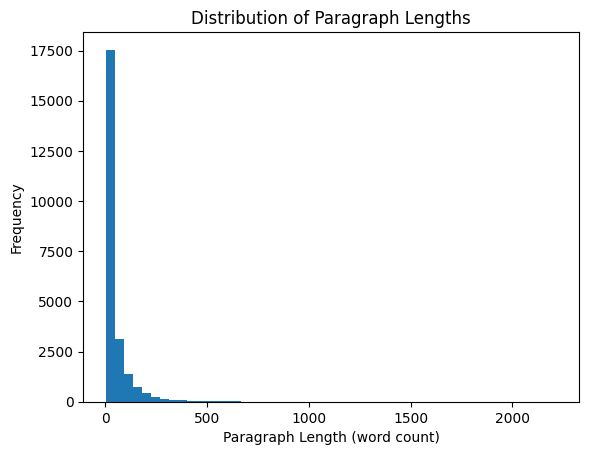

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['paragraph_length'], bins=50)
plt.xlabel('Paragraph Length (word count)')
plt.ylabel('Frequency')
plt.title('Distribution of Paragraph Lengths')
plt.show()


In [ ]:
sample_df = df.groupby('title').sample(n=40, random_state=2025).reset_index(drop=True)
sample_df

,title,paragraph,paragraph_length
0,A Room with a View,"“I have been a failure,” said Miss Bartlett, a...",50
1,A Room with a View,Lucy paused. “Cecil said one day—and I thought...,63
2,A Room with a View,"Miss Bartlett, who was poor at figures, became...",61
3,A Room with a View,An engagement is so potent a thing that sooner...,128
4,A Room with a View,“In the course of conversation they said that ...,56
...,...,...,...
595,The murder of Roger Ackroyd,Caroline does not care a hang for woods at any...,84
596,The murder of Roger Ackroyd,"After the evening talk I have just chronicled,...",143
597,The murder of Roger Ackroyd,“Now I have made it my business to find out mo...,55
598,The murder of Roger Ackroyd,Raymond pushed his chair away from the table v...,77


In [ ]:
df.groupby('title').count()

,paragraph
title,
A Room with a View,405
A farewell to arms,327
Dubliners,392
Martin Eden,830
Metamorphosis,83
Mrs. Dalloway,381
Swann's Way,565
The Age of Innocence,717
"The Awakening, and Selected Short Stories",490


In [ ]:
sample_df.to_csv("sampled_book_paragraphs.csv")